## 仕入商品分析Ⅸ

- ○○○○分析（仕入先CD=90396）

- XXXX.csv 製品CD
- out_cd.csv 2021.01よりXXXXX GmbH(90463)から仕入となった品目

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta # 翌月の算出

!pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 11.5 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=1eff1f683abc9e2340062a9347374fab71c818a4c28bbb0d55b307cfeada402e
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
target_col = ['仕入先CD', '仕入先名', '仕入月', '品目', '品名', '規格', '大分類CD', '大分類名', '仕入数', '仕入単価', '仕入金額', '年度']
siiredf_n = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/N_S_2007_2022.csv", usecols=target_col)

target_col = ['年度', '売上月', '品目', '品名', '規格', '販売数量', '販売単価', '販売金額', '請求先CD']
uriagedf_n = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/N_U_2020_2022.csv", usecols=target_col)

target_col = ['棚卸月', '品目', '品名', '規格', '在庫数', '在庫単価', '在庫金額']
zaikodf_n = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/N_Z_2020_2022.csv", usecols=target_col)

target_col = ['年度', '売上月', '品目', '品名', '規格', '販売数量', '販売単価', '販売金額']
uriagedf_i = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/I_U_2009_2022.csv", usecols=target_col)

target_col = ['棚卸月', '品目', '品名', '規格', '在庫数', '在庫単価', '在庫金額']
zaikodf_i = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/I_Z_2009_2022.csv", usecols=target_col)

medit_df = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/XXXXX.csv", encoding='cp932')

out_cd_df = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/out_cd.csv", encoding='cp932')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
XXXXX_df.columns

Index(['CD', '品名（CD）', '規格（CD）', 'NISSIN', '品名（NISSIN）', '規格（NISSIN）', 'ICAST',
       '品名（ICAST）', '規格（ICAST）'],
      dtype='object')

In [ ]:
medit_df

In [ ]:
medit_df = medit_df.fillna(0)
medit_df['CD'] = medit_df['CD'].astype(int)
medit_df['NISSIN'] = medit_df['NISSIN'].astype(int)
medit_df['ICAST'] = medit_df['ICAST'].astype(int)

In [ ]:
medit_df.head()

In [ ]:
siiredf_n = siiredf_n[siiredf_n['仕入先CD'] == 90396]
siiredf_n['品目'] = siiredf_n['品目'].astype(int)
siiredf_n['仕入数'] = siiredf_n['仕入数'].astype(int)
siiredf_n['仕入金額'] = siiredf_n['仕入金額'].astype(int)
siiredf_n.head()

In [ ]:
out_cd_list = list(out_cd_df['CD'])

In [ ]:
# Medit製品コードのlistを作成
medit_cd_list = []
for i in range(len(medit_df)):
    if medit_df.iloc[i]['NISSIN'] != 0:
        medit_cd_list.append(medit_df.iloc[i]['NISSIN'])
    if medit_df.iloc[i]['ICAST'] != 0:
        if medit_df.iloc[i]['ICAST'] not in medit_cd_list:
            medit_cd_list.append(medit_df.iloc[i]['ICAST'])
    if medit_df.iloc[i]['CD'] < 500000:
        if medit_df.loc[i]['CD'] not in medit_cd_list:
            medit_cd_list.append(medit_df.loc[i]['CD'])

In [ ]:
zaikodf_n_202202 = zaikodf_n[zaikodf_n['品目'].isin(medit_cd_list)]
zaikodf_n_202202

In [ ]:
# Medit仕入コードのlistを作成
medit_siire_list = []
for i in range(len(medit_df)):
    if medit_df.iloc[i]['CD'] != 0:
        medit_siire_list.append(medit_df.iloc[i]['CD'])

In [ ]:
# Medit製品コード(ICAST)のlistを作成
medit_icast_list = []
for i in medit_cd_list:
    medit_icast_list.append('I' + str(i))
out_icast_cd = []
for i in out_cd_list:
    out_icast_cd.append('I' + str(i))

In [ ]:
siiredf_n['仕入月'] = pd.to_datetime((siiredf_n['仕入月']*100+1), format='%Y%m%d')

In [ ]:
tmp_df = siiredf_n.groupby('仕入月')['仕入金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
siiredf_n.columns

Index(['仕入先CD', '仕入先名', '仕入月', '品目', '品名', '規格', '大分類CD', '大分類名', '仕入数',
       '仕入単価', '仕入金額', '年度'],
      dtype='object')

In [ ]:
tmp_df = siiredf_n[siiredf_n['年度']>2016]
                   
tmp_df = tmp_df.groupby('仕入月')['仕入金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
tmp_df = siiredf_n[siiredf_n['年度']==2020]
tmp_df['仕入金額'].sum()

23703316

In [ ]:
tmp_df = tmp_df.groupby('品名')['仕入金額'].sum()
tmp_df = pd.DataFrame(tmp_df, columns=['仕入金額'])

In [ ]:
tmp_df['品名'] = tmp_df.index
tmp_df

In [ ]:
tmp_df

In [ ]:
# 売上データからXXXXX製品を抽出
uriagedf_n = uriagedf_n[uriagedf_n['売上月'] != ' ']
uriagedf_n['売上月'] = uriagedf_n['売上月'].fillna(0)
uriagedf_n['売上月'] = uriagedf_n['売上月'].astype(int)
uriagedf_n = uriagedf_n[uriagedf_n['品目'].isin(medit_cd_list)]
uriagedf_n1 = uriagedf_n[uriagedf_n['売上月'] < 202101]
uriagedf_n2 = uriagedf_n[(uriagedf_n['売上月'] >= 202101) & (~uriagedf_n['品目'].isin(out_cd_list))]
uriagedf_n = pd.concat([uriagedf_n1, uriagedf_n2])

In [ ]:

del uriagedf_n1
del uriagedf_n2

In [ ]:
uriagedf_n['請求先CD'] = uriagedf_n['請求先CD'].astype(int)
uriagedf_n['品目'] = uriagedf_n['品目'].astype(int)
uriagedf_n['販売数量'] = uriagedf_n['販売数量'].astype(int)
uriagedf_n['販売単価'] = uriagedf_n['販売単価'].astype(int)
uriagedf_n['販売金額'] = uriagedf_n['販売金額'].astype(int)

In [ ]:
uriagedf_n['売上月'] = pd.to_datetime((uriagedf_n['売上月']*100+1), format='%Y%m%d')

In [ ]:
tmp=uriagedf_n['品目'].unique()
# sorted(tmp)

In [ ]:
tmp_df = uriagedf_n.groupby('売上月')['販売金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX 売上推移')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
# 売上データからXXXXX製品を抽出
uriagedf_i = uriagedf_i[uriagedf_i['品目'].isin(medit_icast_list)]
uriagedf_i1 = uriagedf_i[uriagedf_i['売上月'] < 202101] 
uriagedf_i2 = uriagedf_i[(uriagedf_i['売上月'] >= 202101) & (~uriagedf_i['品目'].isin(out_icast_cd))]
uriagedf_i = pd.concat([uriagedf_i1, uriagedf_i2])

In [ ]:
uriagedf_i['売上月'] = uriagedf_i['売上月'].astype(int)
uriagedf_i['販売数量'] = uriagedf_i['販売数量'].astype(int)
uriagedf_i['販売単価'] = uriagedf_i['販売単価'].astype(int)
uriagedf_i['販売金額'] = uriagedf_i['販売金額'].astype(int)

In [ ]:
uriagedf_i['売上月'] = pd.to_datetime((uriagedf_i['売上月']*100+1), format='%Y%m%d')

In [ ]:
uriagedf_i

In [ ]:
tmp_df = uriagedf_i.groupby('売上月')['販売金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX YYYYY 売上推移')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
zaikodf_n.head()

In [ ]:
zaikodf_n2 = zaikodf_n[(zaikodf_n['棚卸月'] >= 202101) & (~zaikodf_n['品目'].isin(out_cd_list))]
zaikodf_n = pd.concat([zaikodf_n1, zaikodf_n2])

In [ ]:
del zaikodf_n1
del zaikodf_n2

In [ ]:
zaikodf_n['棚卸月'] = zaikodf_n['棚卸月'].astype(int)
zaikodf_n['品目'] = zaikodf_n['品目'].astype(int)
zaikodf_n['在庫数'] = zaikodf_n['在庫数'].astype(int)
zaikodf_n['在庫単価'] = zaikodf_n['在庫単価'].astype(int)
zaikodf_n['在庫金額'] = zaikodf_n['在庫金額'].astype(int)

In [ ]:
zaikodf_n['棚卸月'] = pd.to_datetime((zaikodf_n['棚卸月']*100+1), format='%Y%m%d')

In [ ]:
tmp_df = zaikodf_n.groupby('棚卸月')['在庫金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX RRRRR 在庫推移')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
zaikodf_n[zaikodf_n['棚卸月']=="2021-03-01"]['在庫金額'].sum()

10170000

In [ ]:
zaikodf_n

In [ ]:
# 在庫データからXXXX製品を抽出
zaikodf_i = zaikodf_i[zaikodf_i['品目'].isin(medit_icast_list)]
zaikodf_i1 = zaikodf_i[zaikodf_i['棚卸月'] < 202101]
zaikodf_i2 = zaikodf_i[(zaikodf_i['棚卸月'] >= 202101) & (~zaikodf_i['品目'].isin(out_icast_cd))]
zaikodf_i = pd.concat([zaikodf_i1, zaikodf_i2])

In [ ]:
del zaikodf_i1
del zaikodf_i2

In [ ]:
zaikodf_i['棚卸月'] = zaikodf_i['棚卸月'].astype(int)
zaikodf_i['在庫数'] = zaikodf_i['在庫数'].astype(int)
zaikodf_i['在庫単価'] = zaikodf_i['在庫単価'].astype(int)
zaikodf_i['在庫金額'] = zaikodf_i['在庫金額'].astype(int)

In [ ]:
zaikodf_i['棚卸月'] = pd.to_datetime((zaikodf_i['棚卸月']*100+1).astype(str))

In [ ]:
tmp_df = zaikodf_i.groupby('棚卸月')['在庫金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='XXXXX RRRRRR 在庫推移')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
print(zaikodf_n.shape)
print(zaikodf_i.shape)

(75, 7)
(325, 7)


In [ ]:
zaikodf = pd.concat([zaikodf_n, zaikodf_i])

In [ ]:
tmp_df = zaikodf.groupby('棚卸月')['在庫金額'].sum()
idx = pd.to_datetime(tmp_df.index)
idx = np.array(idx)
values = tmp_df.values.astype(float) 
num = np.arange(len(idx))

p = np.polyfit(num, values, 1)
f = np.poly1d(p)
x_reg = num
y_reg = f(x_reg)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, title='Total 在庫推移')
ax.plot(idx, values)
ax.plot(idx, y_reg, color='r', label='kaiki')
plt.show()

In [ ]:
zaikodf[zaikodf['棚卸月']=="2021-03-01"]['在庫金額'].sum()

17972717

In [ ]:
zaikodf_n.head()

In [ ]:
# uriagedf_n
tmp_list = []
for i in range(len(uriagedf_n)):
    if uriagedf_n.iloc[i]['売上月'].month > 9:
        tmp_list.append(int(str(uriagedf_n.iloc[i]['売上月'].year) + str(uriagedf_n.iloc[i]['売上月'].month)))
    else:
        tmp_list.append(int(str(uriagedf_n.iloc[i]['売上月'].year) + '0' + str(uriagedf_n.iloc[i]['売上月'].month)))
uriagedf_n['yyyymm'] = tmp_list

# siiredf_n
tmp_list = []
for i in range(len(siiredf_n)):
    if siiredf_n.iloc[i]['仕入月'].month > 9:
        tmp_list.append(int(str(siiredf_n.iloc[i]['仕入月'].year) + str(siiredf_n.iloc[i]['仕入月'].month)))
    else:
        tmp_list.append(int(str(siiredf_n.iloc[i]['仕入月'].year) + '0' + str(siiredf_n.iloc[i]['仕入月'].month)))
siiredf_n['yyyymm'] = tmp_list

# zaikodf_n
tmp_list = []
for i in range(len(zaikodf_n)):
    if zaikodf_n.iloc[i]['棚卸月'].month > 9:
        tmp_list.append(int(str(zaikodf_n.iloc[i]['棚卸月'].year) + str(zaikodf_n.iloc[i]['棚卸月'].month)))
    else:
        tmp_list.append(int(str(zaikodf_n.iloc[i]['棚卸月'].year) + '0' + str(zaikodf_n.iloc[i]['棚卸月'].month)))
zaikodf_n['yyyymm'] = tmp_list

# uriagedf_i
tmp_list = []
for i in range(len(uriagedf_i)):
    if uriagedf_i.iloc[i]['売上月'].month > 9:
        tmp_list.append(int(str(uriagedf_i.iloc[i]['売上月'].year) + str(uriagedf_i.iloc[i]['売上月'].month)))
    else:
        tmp_list.append(int(str(uriagedf_i.iloc[i]['売上月'].year) + '0' + str(uriagedf_i.iloc[i]['売上月'].month)))
uriagedf_i['yyyymm'] = tmp_list

# zaikodf_i
tmp_list = []
for i in range(len(zaikodf_i)):
    if zaikodf_i.iloc[i]['棚卸月'].month > 9:
        tmp_list.append(int(str(zaikodf_i.iloc[i]['棚卸月'].year) + str(zaikodf_i.iloc[i]['棚卸月'].month)))
    else:
        tmp_list.append(int(str(zaikodf_i.iloc[i]['棚卸月'].year) + '0' + str(zaikodf_i.iloc[i]['棚卸月'].month)))
zaikodf_i['yyyymm'] = tmp_list

In [ ]:
# Excelデータ作成
uriagedf_n.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_uriagedf_n.xlsx", sheet_name='uri_n')
siiredf_n.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_siiredf_n.xlsx", sheet_name='siire_n')
zaikodf_n.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_zaikodf_n.xlsx", sheet_name='zaiko_n')
uriagedf_i.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_uriagedf_i.xlsx", sheet_name='uri_i')
zaikodf_i.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_zaikodf_i.xlsx", sheet_name='zaiko_i')
siiredf_i = uriagedf_n[uriagedf_n['請求先CD'] == 10233]
siiredf_i.to_excel("/content/drive/MyDrive/Purchased_products/test-folder/medit_siiredf_i.xlsx", sheet_name='siire_i')

In [ ]:
uriagedf_n['請求先CD'].unique()

array([10233, 10375])

### 粗利計算

In [ ]:
uriagedf_n.iloc[0]['売上月'].date()

datetime.date(2020, 1, 1)

In [ ]:
# 売上データセット
arari_n_dict = {} # 0:売上  1:期首 2:仕入 3:期末 4:原価 5:粗利
for i in range(len(uriagedf_n)):
    tmp_cd = uriagedf_n.iloc[i]['品目']
    tmp_date = uriagedf_n.iloc[i]['売上月']
    if (tmp_cd, tmp_date.date()) in arari_n_dict:
        arari_n_dict[tmp_cd, tmp_date.date()][0] = uriagedf_n.iloc[i]['販売金額']
    else:
        arari_n_dict[tmp_cd, tmp_date.date()] = [uriagedf_n.iloc[i]['販売金額'], 0, 0, 0, 0, 0]

In [ ]:
# 在庫データセット(期末在庫)
for i in range(len(zaikodf_n)):
    tmp_cd = zaikodf_n.iloc[i]['品目']
    tmp_date = zaikodf_n.iloc[i]['棚卸月']
    if (tmp_cd, tmp_date.date()) in arari_n_dict:
        arari_n_dict[tmp_cd, tmp_date.date()][3] = zaikodf_n.iloc[i]['在庫金額']
    else:
        arari_n_dict[tmp_cd, tmp_date.date()] = [0, 0, 0, zaikodf_n.iloc[i]['在庫金額'], 0, 0]

In [ ]:
# 在庫データセット(期首在庫)
for i in range(len(zaikodf_n)):
    tmp_cd = zaikodf_n.iloc[i]['品目']
    tmp_date = zaikodf_n.iloc[i]['棚卸月']
    nextm = tmp_date + relativedelta(months=1)
    if (tmp_cd, nextm.date()) in arari_n_dict:
        arari_n_dict[tmp_cd, nextm.date()][1] = zaikodf_n.iloc[i]['在庫金額']
    else:
        arari_n_dict[tmp_cd, nextm.date()] = [0, zaikodf_n.iloc[i]['在庫金額'], 0, 0, 0, 0]

In [ ]:
# 仕入データセット
for i in range(len(siiredf_n)):
    tmp_cd = siiredf_n.iloc[i]['品目']
    tmp_date = siiredf_n.iloc[i]['仕入月']
    if (tmp_cd, tmp_date.date()) in arari_n_dict:
        arari_n_dict[tmp_cd, tmp_date.date()][2] = siiredf_n.iloc[i]['仕入金額']
    else:
        arari_n_dict[tmp_cd, tmp_date.date()] = [0, 0, siiredf_n.iloc[i]['仕入金額'], 0, 0, 0]

In [ ]:
# 原価、粗利を計算
for i, v in enumerate(arari_n_dict):
    arari_n_dict[v][4] = arari_n_dict[v][1] + arari_n_dict[v][2] - arari_n_dict[v][3]
    arari_n_dict[v][5] = arari_n_dict[v][0] - arari_n_dict[v][4]

In [ ]:
tmp_df = pd.DataFrame(arari_n_dict)
tmp_df = tmp_df.T

In [ ]:
tmp_df = tmp_df.reset_index()
tmp_df['date'] = tmp_df['level_1']
tmp_list = []
tmp_list2 = []
for i in range(len(tmp_df)):
    tmp_list.append(tmp_df.iloc[i]['date'].year)
    if tmp_df.iloc[i]['date'].month > 9:
        tmp_list2.append(int(str(tmp_df.iloc[i]['date'].year) + str(tmp_df.iloc[i]['date'].month)))
    else:
        tmp_list2.append(int(str(tmp_df.iloc[i]['date'].year) + '0' + str(tmp_df.iloc[i]['date'].month)))
tmp_df['year'] = tmp_list
tmp_df['yyyymm'] = tmp_list2
tmp_df = tmp_df.set_index('level_1')

In [ ]:
tmp_df

,level_0,0,1,2,3,4,5,date,year,yyyymm
level_1,,,,,,,,,,
2020-01-01,206721,86020,0,81075,0,81075,4945,2020-01-01,2020,202001
2020-01-01,206792,40246,0,0,0,0,40246,2020-01-01,2020,202001
2020-03-01,207393,-184690,0,-159768,0,-159768,-24922,2020-03-01,2020,202003
2020-03-01,207198,-114087,0,-74413,0,-74413,-39674,2020-03-01,2020,202003
2020-03-01,206946,201229,0,164145,0,164145,37084,2020-03-01,2020,202003
...,...,...,...,...,...,...,...,...,...,...
2021-10-01,514986,0,0,61556,0,61556,-61556,2021-10-01,2021,202110
2021-10-01,902683,0,0,3470,0,3470,-3470,2021-10-01,2021,202110
2022-01-01,514986,0,0,94317,0,94317,-94317,2022-01-01,2022,202201


In [ ]:
tmp_arari = tmp_df[tmp_df['year'] > 2019]
tmp_arari = tmp_arari.groupby('date')[5].sum()

plt.plot(tmp_arari)

## YYYYYY粗利

In [ ]:
# 売上データセット
arari_i_dict = {} # 0:売上  1:期首 2:仕入 3:期末 4:原価 5:粗利
for i in range(len(uriagedf_i)):
    tmp_cd = uriagedf_i.iloc[i]['品目']
    tmp_date = uriagedf_i.iloc[i]['売上月']
    if (tmp_cd, tmp_date.date()) in arari_i_dict:
        arari_i_dict[tmp_cd, tmp_date.date()][0] = uriagedf_i.iloc[i]['販売金額']
    else:
        arari_i_dict[tmp_cd, tmp_date.date()] = [uriagedf_i.iloc[i]['販売金額'], 0, 0, 0, 0, 0]

In [ ]:
# 在庫データセット(期末在庫)
for i in range(len(zaikodf_i)):
    tmp_cd = zaikodf_i.iloc[i]['品目']
    tmp_date = zaikodf_i.iloc[i]['棚卸月']
    if (tmp_cd, tmp_date.date()) in arari_i_dict:
        arari_i_dict[tmp_cd, tmp_date.date()][3] = zaikodf_i.iloc[i]['在庫金額']
    else:
        arari_i_dict[tmp_cd, tmp_date.date()] = [0, 0, 0, zaikodf_i.iloc[i]['在庫金額'], 0, 0]

In [ ]:
# 在庫データセット(期首在庫)
for i in range(len(zaikodf_i)):
    tmp_cd = zaikodf_i.iloc[i]['品目']
    tmp_date = zaikodf_i.iloc[i]['棚卸月']
    nextm = tmp_date + relativedelta(months=1)
    if (tmp_cd, nextm.date()) in arari_i_dict:
        arari_i_dict[tmp_cd, nextm.date()][1] = zaikodf_i.iloc[i]['在庫金額']
    else:
        arari_i_dict[tmp_cd, nextm.date()] = [0, zaikodf_i.iloc[i]['在庫金額'], 0, 0, 0, 0]

In [ ]:
# 仕入データセット
siiredf_i = uriagedf_n[uriagedf_n['品目'].isin(medit_icast_list)]
for i in range(len(siiredf_i)):
    tmp_cd = "I" + str(siiredf_i.iloc[i]['品目'])
    tmp_date = siiredf_i.iloc[i]['仕入月']
    if (tmp_cd, tmp_date.date()) in arari_i_dict:
        arari_i_dict[tmp_cd, tmp_date.date()][2] = siiredf_n.iloc[i]['仕入金額']
    else:
        arari_i_dict[tmp_cd, tmp_date.date()] = [0, 0, siiredf_i.iloc[i]['仕入金額'], 0, 0, 0]

In [ ]:
# 原価、粗利を計算
for i, v in enumerate(arari_i_dict):
    arari_i_dict[v][4] = arari_i_dict[v][1] + arari_i_dict[v][2] - arari_i_dict[v][3]
    arari_i_dict[v][5] = arari_i_dict[v][0] - arari_i_dict[v][4]

In [ ]:
tmp_df = pd.DataFrame(arari_i_dict)
tmp_df = tmp_df.T

In [ ]:
tmp_df = tmp_df.reset_index()
tmp_df['date'] = tmp_df['level_1']
tmp_list = []
tmp_list2 = []
for i in range(len(tmp_df)):
    tmp_list.append(tmp_df.iloc[i]['date'].year)
    if tmp_df.iloc[i]['date'].month > 9:
        tmp_list2.append(int(str(tmp_df.iloc[i]['date'].year) + str(tmp_df.iloc[i]['date'].month)))
    else:
        tmp_list2.append(int(str(tmp_df.iloc[i]['date'].year) + '0' + str(tmp_df.iloc[i]['date'].month)))
tmp_df['year'] = tmp_list
tmp_df['yyyymm'] = tmp_list2
tmp_df = tmp_df.set_index('level_1')

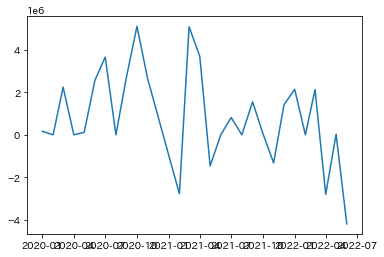

In [ ]:
tmp_arari = tmp_df[tmp_df['year'] > 2019]
tmp_arari = tmp_arari.groupby('date')[5].sum()

plt.plot(tmp_arari)

In [ ]:
uriagedf_n.head()

In [ ]:
a = uriagedf_n[(uriagedf_n['売上月'] >= '2020-06-01') & (uriagedf_n['売上月'] <= '2021-05-01')]
b = a[a['請求先CD']==10233]
b['販売金額'].sum()

32645560

In [ ]:
a['請求先CD'].unique()

array([10233, 10375])

In [ ]:
uriagedf_n['請求先CD'].unique()

array([10233, 10375])

In [ ]:
x1 = uriagedf_n[uriagedf_n['請求先CD']==10233]
x2 = uriagedf_n[uriagedf_n['請求先CD']==10375]

In [ ]:
x11 = x1[x1['年度']==2020]
x12 = x1[x1['年度']==2021]
x21 = x2[x2['年度']==2020]
x22 = x2[x2['年度']==2021]

In [ ]:
print(x11['販売金額'].sum())
print(x12['販売金額'].sum())
print(x21['販売金額'].sum())
print(x22['販売金額'].sum())

32645560
12209942
319440
0


In [ ]:
uriagedf_n[uriagedf_n['請求先CD']==10375]

In [ ]:
x2

In [ ]:
a = uriagedf_n[uriagedf_n['年度']==2021]
a['販売金額'].sum()

12209942

In [ ]:
a = a[a['請求先CD']==10233]

In [ ]:
a['販売金額'].sum()

12209942